# Jordan Holbrook - University of Houston Economics
## 2nd Year Summer Project
### 7/20/2022 Project Update
# A simple life-cycle model in general equilibrium


### This code has been adapted and refactored from authors Frederik Bjørn Christensen & Tim Dominik Maurer, https://github.com/Frederik-Tim-Econ/Course-in-Computational-Macro, Short Course in Computational Macroeconomics, Iowa State Univeristy, Fall semester 2021, Toolkit on coding multiperiod OLG models

# 1. Model features

* Time is discrete and indexed by $t \in \{0,1,2,..\}$.
* There is no growth in technology level or population size.

## 1.1.Households
* Agents live for $T$ periods and retire in period $R$.
* Household age is discrete and indexed by $j \in \{1,2,..,T\}$.
* They own capital and supply labor exogenously.

### The Problem
Agents born at time $t$, who start to consume in period $t+1$, maximize the present value of life-time utility w.r.t. consumption $c$ subject to a period-by-period budget constraint. The problem reads:

\begin{align}
\max_{\left\{ c_{t}^{i},a_{t}^{i}\right\} }\text{ }U & =\sum_{j=1}^{T}\beta^{t}u(c_{j,t})\\
& s.t.\\
c_{j,t}+a_{j,t} & =w_{t+j}l_{j,t}+\left(1+r_{t+j}\right)a_{j-1,t} \quad \quad \text{with }  a_{0,t}=0\\
\end{align}

Here, $a$ are savings, $w$ is the wage rate, $r$ is the interest rate on capital and $l$ is exogenous labor supply with:
\begin{equation}
l_j = \begin{cases}
1 \quad \text{if } j\leq R\\
0 \quad \text{otherwise}
\end{cases}
\end{equation}

We choose CRRA-utility such that:
\begin{equation}
u(c) = \begin{cases}
\dfrac{c^{1-\rho}-1}{1-\rho} & \rho\geq0,\rho\neq1 \\\
\log(c) & \rho=1
\end{cases}
\end{equation}


### FOC
Derive the period-by-period Euler-Equation:

\begin{align}
c_{j+1,t} & = c_{j,t}\left[\beta\left(1+r_{t+j+1}\right)\right]^{\frac{1}{\rho}}
\tag{L1.1}
\end{align}

Derive the long-term Euler-Equation:

\begin{align}
c_{j,t}=c_{1,t}\left[\beta^{j-1}\prod_{x=2}^{j}\left(1+r_{t+x}\right)\right]^{\frac{1}{\rho}} \quad \text{for } j>1
\tag{L1.2}
\end{align}

### Consolidated budget constraint
Derive the consolidated budget constraint at birth:
\begin{align}
\sum_{j=1}^{T}\dfrac{c_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}=\sum_{j=1}^{T}\dfrac{w_{t+j}l_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}
\end{align}

### Solve for $c_1$
Solve for $c_{1,t}$ by eliminating $c_{j,t}$ using the long-term Euler-Equation:
\begin{align}
c_{1,t}=\dfrac{\sum_{j=1}^{T}\dfrac{w_{t+j}l_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}{\sum_{j=1}^{T}\dfrac{\left[\dfrac{\beta^{j-1}}{\left(1+r_{t+1}\right)}\prod_{x=1}^{j}\left(1+r_{t+x}\right)\right]^{\frac{1}{\rho}}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}
\tag{L1.3}
\end{align}

## 1.2. Firms
* There is a single consumption good, which is produced using a neoclassical aggregate production function $Y_t=F\left(K_t,L_{t}\right)$ from $K_t$ units of capital and $L_{t}$ labor units supplied at time $t$. 
* We assume that $F$ is CRS and Cobb-Douglas, $Y_{t} =K_{t}^{\alpha}L_{t}^{1-\alpha}$.

* Firms maximise their profits:
\begin{align}
\max_{\left\{ K_{t},L_{t}\right\} }\text{ } \Pi_{t} & =Y_{t}-\left(r_{t}+\delta\right)K_{t}-w_{t}L_{t},
\end{align}
where $\delta$ is the depreciation rate of captial and $r_{t} + \delta$ is the capital rental rate.

## 2. Equilibrium
* Households maximize utility
* Firms maximize profits
* The the capital market, the labor market as well as the goods market clear in equilibrium:
\begin{align}
    K_{t+1} & =\sum_{j=1}^{T}a_{j,t-j}\\
    L_t & =\sum_{j=1}^{T}l_{j,t-j} \\
    Y_{t} & = C_t + I_t = C_t + K_{t+1} - (1-\delta) K_t
\end{align}
* Equilibrium factor prices equal
\begin{align}
    r_{t} & =\alpha\left(\dfrac{K_{t}}{L_{t}}\right)^{\alpha-1}-\delta\\
    w_{t} & =\left(1-\alpha\right)\left(\dfrac{K_{t}}{L_{t}}\right)^{\alpha}
\end{align}
Note that  $C_t=\sum_{j=1}^{T}c_{j,t-j}$.


## 3. Solving the steady state
In a steady state equilibrium we have that capital and thus factor prices are constant. For optimal first period consumption this implies:

\begin{equation*}
c_1=\dfrac{w\sum_{j=1}^{T}\dfrac{l_{j}}{\left(1+r\right)^{j}}}{\sum_{j=1}^{T}\dfrac{\left[\beta\left(1+r\right)\right]^{\frac{j-1}{\rho}}}{\left(1+r\right)^{j}}}
\label{eq:c_1ss} \tag{L1.4}
\end{equation*}


### 3.1 Alogrithm to find steady-state capital level

To solve for steady-state capital we use a solution algorithm proceeding as follows:
1. Guess a steady-state capital stock $K^{\prime}$
2. Calculate factor prices $w^{\prime}$ and $r^{\prime}$ given $K^{\prime}$ 
3. Solve for $c_1$ in euqation $(L1.4)$ given  $w^{\prime}$ and $r^{\prime}$
4. Solve $c_j \forall j>1$ using the Euler equation $c_{j+1}=\left[\beta\left(1+r^{\prime}\right)\right]^{-\frac{1}{\rho}} c_{j}$
5. Solve $a_j \forall j>1$ using the budget constraint $a_{j} =w^{\prime}l_{j}+\left(1+r^{\prime}\right) a_{j-1}-c_{j}$
6. Compute implied aggregate capital $K^{\prime\prime} =\sum_{j=1}^{T}a_{j}$
8. Check whether aggregate capital equals the guess $K^{\prime}$
9. Update guess of capital until convergence, $K^{\prime}\approx K^{\prime\prime}$


# 4. Implementation

In [38]:
# Import packages
import numpy as np
import scipy.optimize as optimize
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
from IPython import display

### 4.1 Calibration

In [65]:
# Define a dictionary for model parameters
par = dict() 
# Calibrate parameters
par['T'] = 80 # max age
par['R'] = 65 # retirement age
par['α'] = 1/3 # output elasticities of capital
par['ρ'] = 2 # risk aversion parameter
par['δ'] = 0.07 # yearly depreciation rate
par['β'] = 0.95 # agent's patience parameter
# vector exogenous labor supply given retirement
par['l'] = np.concatenate([np.ones(par['R']),np.zeros([par['T'] - par['R']])]) 
par['L'] = sum(par['l']) # aggregate labor supply

# unpack
T = par['T']
R = par['R']
α = par['α']
ρ = par['ρ']
δ = par['δ']
β = par['β']
l = par['l']
L = par['L']

In [66]:
# STEP 1: Guess a steady-state capital level
K = 35

# STEP 2: Calculate factor prices given the guessed captial level
r = α*(K/L)**(α-1) - δ
w = (1 - α)*(K/L)**α

# print factor prices
print('interest rate:',r) 
print('         wage:',w) 


interest rate: 0.4336269401720438
         wage: 0.5423674740314318


### 4.4 Function solving the model for given factor prices

In [67]:
# Solve fore the consumption and savings plan given an interest rate
def solve(K_guess,par): # Solve for consumption, savings and aggregate capital given a guess for r

    # Unpacking Parameters
    T = par['T']
    ρ = par['ρ']
    δ = par['δ']
    β = par['β']
    l = par['l']
    L = par['L']

    # STEP 2: Solve for wage given guessed interest rate
    r = α*(K_guess/L)**(α-1) - δ
    w = (1 - α)*(K_guess/L)**α

    # STEP 3: Solve for first periond consumption as in equation (L1.4)
    C1 = w*sum(l/(1+r)**np.linspace(1,T,T))/sum((β*(1+r))**((np.linspace(1,T,T)-1)/ρ)/(1+r)**np.linspace(1,T,T))
    
    # STEP 4: Solve for the whole consumption path using the Long-Run Euler equation (L1.2)
    C = C1*(β*(1+r))**((np.arange(T))/ρ)

    # STEP 5: Solve for the whole saviongs path using the budget constraint
    A = np.zeros(T) # preallocate storage
    A[0] = w*l[0] - C[0] # solve for first period savings given no initial wealth
    for t in range(T): # solve the whole savings path
        if t>0:
            A[t] = w*l[t] + (1 + r)*A[t-1] - C[t]

    # STEP 6: Compute implied aggregate capital by summing over savings path
    K_implied = sum(A)
     
    return C,A,K_implied


# Define objective function that outputs the distances between K_guess and K_implied (STEP 8)
def objective(K_guess,par): # Solves the SS
   
    C,A,K_implied = solve(K_guess,par) 
    
    # STEP 8: Check distance between K_guess - K_implied (Note we define the loss as the squared difference)
    loss = (K_guess - K_implied)**2  
    return loss

### 4.5 Function define loss given guess

In [68]:
# Define a model-consistent level of the lower bound
r_lb = 0.01 - δ # lower bound r
K_ub = L*((r_lb+δ)/α)**(1/(α-1)) # upper bound K(r_lb)
print('    Upper bound of K:',K_ub)

# STEP 9: Minimize loss

# using an initial guess
Kguess = 100
#sol = optimize.minimize(objective,Kguess,args=(par))

# using bounds (constrained optimization)
sol = optimize.minimize_scalar(objective,bounds=[0,K_ub],args=(par),method='bounded')

# Equilibrium capital stock
K_ss = sol.x
print('Steady-state capital:',K_ss)

C_ss,A_ss,K_ss = solve(K_ss,par)

# add zero wealth at birth
A_ss = np.concatenate([np.zeros(1),A_ss]) 

    Upper bound of K: 12509.255832441879
Steady-state capital: 288.9170158253846


### 4.7 Steady-state consumption and savings paths

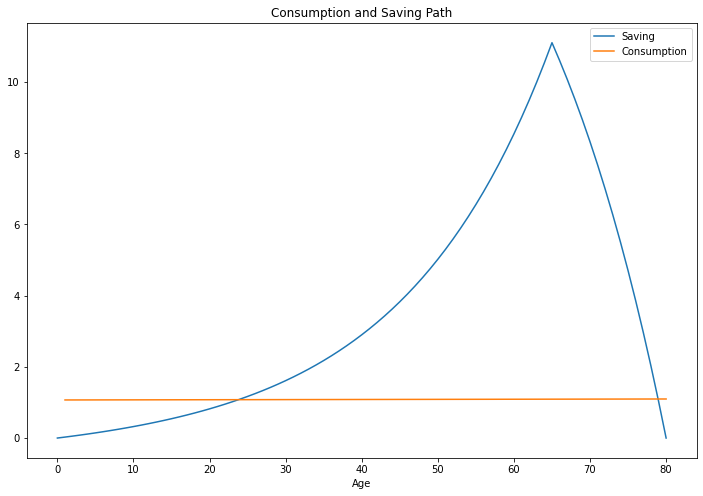

In [55]:
plt.plot(np.arange(T+1),A_ss)
plt.plot(np.linspace(1,T,T),C_ss)
plt.title('Consumption and Saving Path')
plt.xlabel("Age")
plt.gca().legend(('Saving','Consumption'))
plt.xticks(np.arange(0,T+1,10))
plt.show()

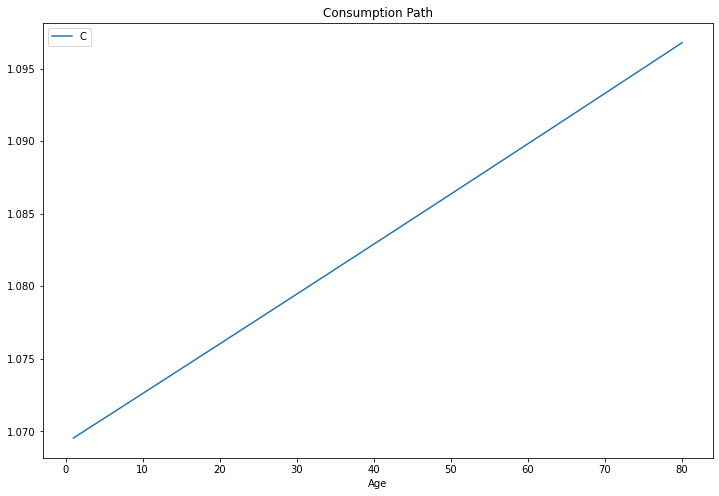

In [56]:
plt.plot(np.linspace(1,T,T),C_ss)
plt.title('Consumption Path')
plt.xlabel("Age")
plt.gca().legend("Consumption")
plt.xticks(np.arange(0,T+1,10))
plt.show()




# Introducing a pension scheme to the code 

* The equations below introduce a balanced-budget pay-as-you-go pension scheme to the model. Working agents contribute a constant share of their wage income $\tau$ to such a pension scheme, while retired agents receive a benefit $b_t$.

###  The balanced budget
\begin{align}
       \tau w_t \sum_{j=1}^{R} l_{j,t-j} & = \sum_{j=R+1}^{T} b_{t} \\
\end{align}

###  The household problem
With a pension system, the household problem reads:
\begin{align}
\max_{\left\{ c_{t}^{i},s_{t}^{i}\right\} }\text{ }U & =\sum_{j=1}^{T}\beta^{t}u(c_{j,t})\\
& s.t.\\
c_{j,t}+a_{j,t} & =\left( 1-\tau \right) w_{t+j}l_{j,t}+\left(1+r_{t+j}\right)a_{j-1,t} + \left(1-l_{j,t}\right)b_t \quad \quad \text{with }  a_{0,t}=0
\end{align}


### Consolidated budget constraint
Deriving the consolidated budget constraint at birth yields:
\begin{align}
\sum_{j=1}^{T}\dfrac{c_{j,t}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}= \sum_{j=1}^{T}\dfrac{\left( 1-\tau \right) w_{t+j}l_{j,t} +\left(1-l_{j,t}\right)b_{t+j}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}
\end{align}

### Solve for $c_1$
Solving for $c_{1,t}$ by eliminating $c_{j,t}$ using the long-term Euler-Equation:
\begin{align}
c_{1,t}=\dfrac{\sum_{j=1}^{T}\dfrac{\left( 1-\tau \right) w_{t+j}l_{j,t} +\left(1-l_{j,t}\right)b_{t+j}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}{\sum_{j=1}^{T}\dfrac{\left[\dfrac{\beta^{j-1}}{\left(1+r_{t+j}\right)}\prod_{x=1}^{j}\left(1+r_{t+x}\right)\right]^{\frac{1}{\rho}}}{\prod_{x=1}^{j}\left(1+r_{t+x}\right)}}
\end{align}

## Steady State
The closed-form solution for first-period consumption for given steady-state factor prices reads:
\begin{equation}
c_1=\dfrac{\sum_{j=1}^{T}\dfrac{\left( 1-\tau \right) w l_{j}  +   \left(1-l_{j}\right)b }{\left(1+r\right)^{j}}}{\sum_{j=1}^{T}\dfrac{\left[\beta\left(1+r\right)\right]^{\frac{j-1}{\rho}}}{\left(1+r\right)^{j}}}
\end{equation}

where:
\begin{align}
       b = & \tau w \dfrac{  \sum_{j=1}^{T}  l_{j} }{T-R}
\end{align}

steady-state saving can then be traced back via the period-by-period budget.





In [80]:
# Define a dictionary for model parameters
par = dict() 
# Calibrate parameters
par['T'] = 80 # max age
par['R'] = 65 # retirement age
par['α'] = 1/3 # output elasticities of capital
par['ρ'] = 2 # risk aversion parameter
par['δ'] = 0.07 # yearly depreciation rate
par['β'] = 0.95 # agent's patience parameter
par['τ'] = 0.1 # Income Tax used to fund the pension scheme

# vector exogenous labor supply given retirement
par['l'] = np.concatenate([np.ones(par['R']),np.zeros([par['T'] - par['R']])]) 
par['L'] = sum(par['l']) # aggregate labor supply

# unpack
T = par['T']
R = par['R']
α = par['α']
ρ = par['ρ']
δ = par['δ']
β = par['β']
τ = par['τ']
l = par['l']
L = par['L']


### Pension Benefit

\begin{align}
       b = & \tau w \dfrac{  \sum_{j=1}^{T}  l_{j} }{T-R}
\end{align}



In [81]:
b = τ*w*sum(l)/(T-R)
b

0.23502590541362048

In [84]:
# Solve fore the consumption and savings plan given an interest rate
def solve_pension(K1_guess,par): # Solve for consumption, savings and aggregate capital given a guess for r

    # Unpacking Parameters
    T = par['T']
    ρ = par['ρ']
    δ = par['δ']
    β = par['β']
    τ = par['τ']
    l = par['l']
    L = par['L']

    # STEP 2: Solve for wage given guessed interest rate
    r = α*(K1_guess/L)**(α-1) - δ
    w = (1 - α)*(K1_guess/L)**α

    # STEP 3: Solve for first periond consumption as in equation (L1.4)
    #C1_τ = sum((1-τ)*w*l+(1-l)*b)/(1+r)**np.linspace(1,T,T)))/sum((β*(1+r))**((np.linspace(1,T,T)-1)/ρ)/(1+r)**np.linspace(1,T,T))
    #print('C1:',C1_τ) 
    C1_τ = sum(( (1-τ)*l*w + (1-l)*b)/(1+r)**np.linspace(1,T,T))/sum((β*(1+r))**((np.linspace(1,T,T)-1)/ρ)/(1+r)**np.linspace(1,T,T))
    # STEP 4: Solve for the whole consumption path using the Long-Run Euler equation (L1.2)
    C_τ = C1_τ*(β*(1+r))**((np.arange(T))/ρ)

    # STEP 5: Solve for the whole saviongs path using the budget constraint
    A1 = np.zeros(T) # preallocate storage
    A1[0] = (1-τ)*w*l[0] - C_τ[0] # solve for first period savings given no initial wealth
    for t in range(T): # solve the whole savings path
        if t>0:
            A1[t] = (1-τ)*w*l[t] +(1-l[t])*b + (1 + r)*A1[t-1] - C_τ[t]

    # STEP 6: Compute implied aggregate capital by summing over savings path
    K1_implied = sum(A1)
     
    return C_τ,A1,K1_implied

# Define objective function that outputs the distances between K_guess and K_implied (STEP 8)
def objective_pension(K1_guess,par): # Solves the SS
   
    C_τ,A,K1_implied = solve_pension(K1_guess,par) 
    
    # STEP 8: Check distance between K_guess - K_implied (Note we define the loss as the squared difference)
    loss = (K1_guess - K1_implied)**2  
    return loss

In [85]:
# Define a model-consistent level of the lower bound
r_lb = 1e-4 - δ # lower bound r
K_ub = L*((r_lb+δ)/α)**(1/(α-1)) # upper bound K(r_lb)
print('    Upper bound of K:',K_ub)

# STEP 9: Minimize loss

# using an initial guess
Kguess = 100
sol_pension = optimize.minimize(objective_pension,Kguess,args=(par))

par['τ'] = 0.1
# using bounds (constrained optimization)
#sol_pension = optimize.minimize_scalar(objective_pension,bounds=[0,K_ub],args=(par),method='bounded',options={'xatol': 1e-4, 'maxiter': 10000})

# Equilibrium capital stock
K1_ss = sol_pension.x
print('Steady-state capital:',K1_ss[0])

C_τ_ss,A1_ss,K1_ss = solve_pension(K1_ss,par)

# add zero wealth at birth
A1_ss = np.concatenate([np.zeros(1),A1_ss]) 

    Upper bound of K: 12509255.832441332
Steady-state capital: [269.55529269]


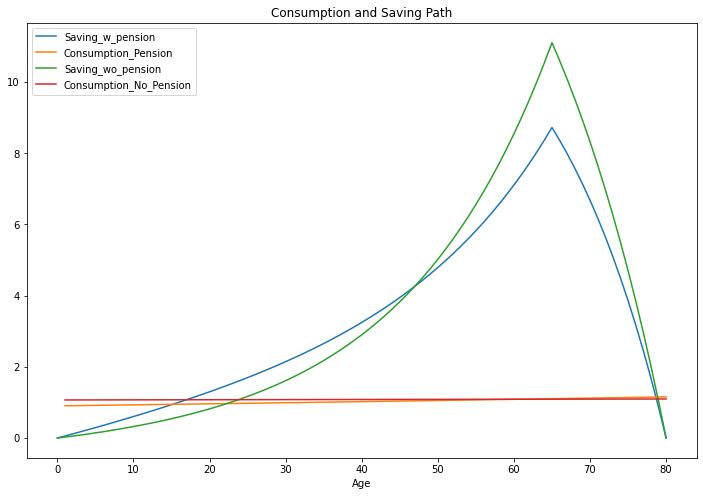

In [86]:
plt.plot(np.arange(T+1),A1_ss)
plt.plot(np.linspace(1,T,T),C_τ_ss)
plt.plot(np.arange(T+1),A_ss)
plt.plot(np.linspace(1,T,T),C_ss)
plt.title('Consumption and Saving Path')
plt.xlabel("Age")
plt.gca().legend(('Saving_w_pension','Consumption_Pension','Saving_wo_pension','Consumption_No_Pension'))
plt.xticks(np.arange(T))
plt.xticks(np.arange(0,T+1,10))
plt.show()

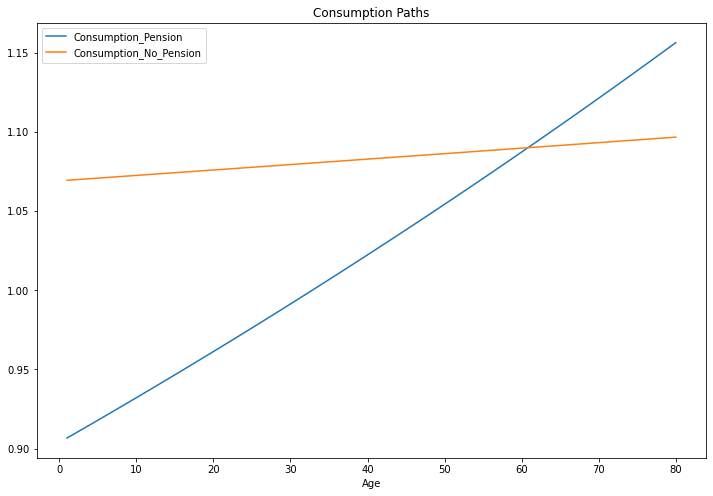

In [87]:
plt.plot(np.linspace(1,T,T),C_τ_ss)
plt.plot(np.linspace(1,T,T),C_ss)
plt.title('Consumption Paths')
plt.xlabel("Age")
plt.gca().legend(('Consumption_Pension','Consumption_No_Pension'))
plt.xticks(np.arange(T))
plt.xticks(np.arange(0,T+1,10))
plt.show()

In [99]:
print(" -------------------------------------")
print(" --------- Model Comparision ---------")
print("Lifetime Consumption Baseline = {:6.4f}".format(sum(C_ss)))
print("Lifetime Consumption Pension Model = {:6.4f}".format(sum(C_τ_ss)))
print("Steady-state Capital Baseline = {:6.4f}".format(K_ss))
print("Steady-state Capital Pension Model = {:6.4f}".format(K1_ss))
print(" -------------------------------------")


 -------------------------------------
 --------- Model Comparision ---------
Lifetime Consumption Baseline = 86.6485
Lifetime Consumption Pension Model = 82.1244
Steady-state Capital Baseline = 288.9170
Steady-state Capital Pension Model = 269.5553
 -------------------------------------
